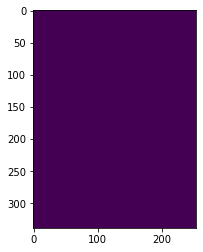

In [1]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt

# Read in a spectral cube
cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23_test.fits' # Example data
cube = SpectralCube.read(cubename)

# Make 2D example so it will run faster, same result of edges being lost when using a cube
mom0 = cube.moment0() # Moment 0 of original cube
repro_mom0 = mom0.reproject(mom0.header, order='nearest-neighbor') # Reproject Moment 0 to same header

# Get the masks of the Moment 0's (there is no get_mask_array for Projection objects)
mom0_mask = np.isfinite(mom0)
repro_mom0_mask = np.isfinite(repro_mom0)

# Find where the masks are different with xor
edges = np.logical_xor(mom0_mask, repro_mom0_mask)

# Plot an image of the edges
plt.imshow(edges)

In [2]:
from astropy.wcs import WCS
import reproject

In [3]:
hdu = mom0.hdu
ww = mom0.wcs
reproj, weight = reproject.reproject_interp(hdu, mom0.header, order='nearest-neighbor')

In [4]:
np.unique(weight)

array([0., 1.])

In [5]:
np.isnan(reproj).sum(), np.isnan(mom0).sum()

(51148, 51148)

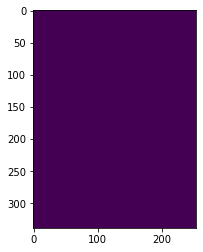

In [6]:
plt.imshow((weight==0) ^ (np.isnan(mom0)))

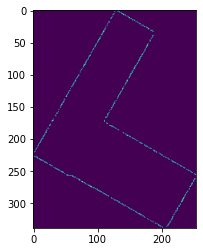

In [7]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt

# Read in a spectral cube
cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23_test.fits' # Example data
cube = SpectralCube.read(cubename)

cutcube = cube[:1]
repro_cutcube = cutcube.reproject(cutcube.header)

cutcube_mask = np.isfinite(cutcube)
repro_cutcube_mask = np.isfinite(repro_cutcube)

edges = np.logical_xor(cutcube_mask, repro_cutcube_mask)

plt.imshow(edges[0])

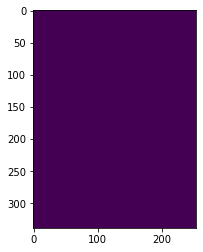

In [8]:
from spectral_cube import SpectralCube
import numpy as np
import matplotlib.pyplot as plt

# Read in a spectral cube
cubename = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/g5.H2CO.spw23_test.fits' # Example data
cube = SpectralCube.read(cubename)

cutcube = cube[:1]
repro_cutcube = cutcube.reproject(cutcube.header, order='nearest-neighbor')

cutcube_mask = np.isfinite(cutcube)
repro_cutcube_mask = np.isfinite(repro_cutcube)

edges = np.logical_xor(cutcube_mask, repro_cutcube_mask)

plt.imshow(edges[0])

In [10]:
from spectral_cube.cube_utils import mosaic_cubes

In [13]:
part1 = cube[:5, :round(cube.shape[1]*2./3.),:]
part2 = cube[:5, round(cube.shape[1]/3.):,:]
part1, part2

(SpectralCube with shape=(5, 226, 254):
  n_x:    254  type_x: RA---TAN  unit_x: deg    range:   269.715466 deg:  269.944124 deg
  n_y:    226  type_y: DEC--TAN  unit_y: deg    range:   -24.619272 deg:  -24.434399 deg
  n_s:      5  type_s: FREQ      unit_s: Hz     range: 218846146366.949 Hz:218848099571.800 Hz,
 SpectralCube with shape=(5, 226, 254):
  n_x:    254  type_x: RA---TAN  unit_x: deg    range:   269.715553 deg:  269.944043 deg
  n_y:    226  type_y: DEC--TAN  unit_y: deg    range:   -24.526428 deg:  -24.341555 deg
  n_s:      5  type_s: FREQ      unit_s: Hz     range: 218846146366.949 Hz:218848099571.800 Hz)

In [14]:
cubes = [part1, part2]

In [15]:
result = mosaic_cubes([part1, part2], order='nearest-neighbor')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/cube_utils.py:845: RuntimeWarning: invalid value encountered in divide
  final_array[ss] /= mask_opt


In [21]:
from spectral_cube.cube_utils import combine_headers
spectral_block_size = 100
kwargs = {'order': 'nearest-neighbor'}

In [40]:
from spectral_cube.tests.test_spectral_cube import cube_and_raw

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /home/adamginsburg/.config/yt/ytrc is deprecated in favor of /home/adamginsburg/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [87]:
cube, data = cube_and_raw('/orange/adamginsburg/repos/spectral-cube/.tox/test/lib/python3.7/site-packages/spectral_cube/tests/data/adv.fits', use_dask=False)
data_ = np.zeros([x+2 for x in data.shape])
data_[1:data.shape[0]+1, 1:data.shape[1]+1, 1:data.shape[2]+1] = data
print(data_.sum(), data.sum())
data = data_
cube._data = data
cube._mask = None #np.isfinite(data)
print(cube.sum())

part1 = cube[:, :round(cube.shape[1]*2./3.),:]
part2 = cube[:, round(cube.shape[1]/3.):,:]

cubes = [part1, part2]

12.130082662959833 12.130082662959833
12.130082662959833 K


INFO: Auto-setting vmin to -9.682e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.075e+00 [aplpy.core]


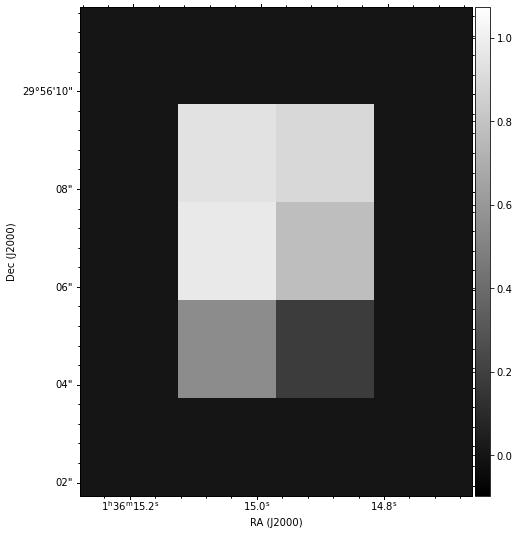

In [88]:
cube[1].quicklook()

INFO: Auto-setting vmin to -9.642e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.070e+00 [aplpy.core]


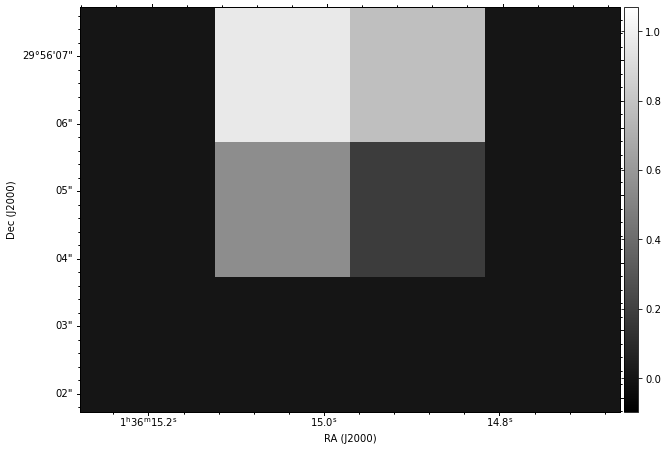

In [91]:
part1[1].quicklook()

INFO: Auto-setting vmin to -9.688e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.075e+00 [aplpy.core]


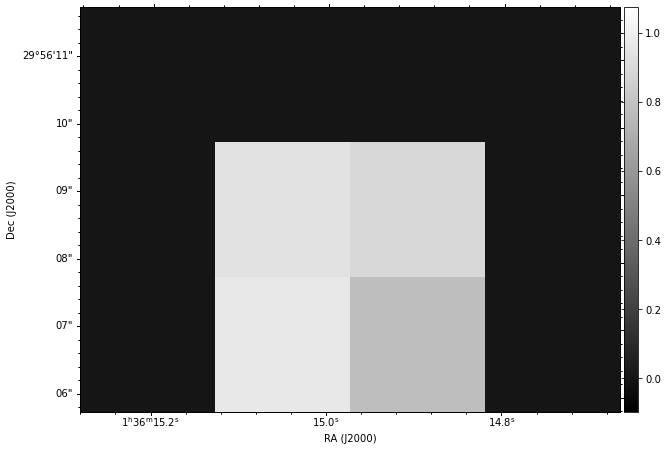

In [92]:
part2[1].quicklook()

In [93]:
xx = part1.reproject(part1.header, order='nearest-neighbor')
xx.sum(), part1.sum()

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:403: RuntimeWarning: invalid value encountered in subtract
  return ckms * (restfreq-x) / x


(<Quantity 0. K>, <Quantity 8.13060771 K>)

In [79]:
    masks = []
    cube1 = cubes[0]
    header = cube1.header

    # Create a header for a field containing all cubes
    for cu in cubes[1:]:
        header = combine_headers(header, cu.header)

    # Prepare an array and mask for the final cube
    shape_opt = (header['NAXIS3'], header['NAXIS2'], header['NAXIS1'])
    final_array = np.zeros(shape_opt)
    mask_opt = np.zeros(shape_opt[1:])

    for cube in cubes:
        # Reproject cubes to the header
        try:
            cube_repr = cube.reproject(header, block_size=[spectral_block_size, cube.shape[1], cube.shape[2]], **kwargs)
        except TypeError:
            warnings.warn("The block_size argument is not accepted by `reproject`.  A more recent version may be needed.")
            cube_repr = cube.reproject(header, **kwargs)
        print(cube_repr.sum(), np.nansum(cube_repr))

        # Create weighting mask
        mask = (cube_repr[0:1].get_mask_array()[0])
        masks.append(mask)
        mask_opt += mask.astype(float)
        print(f'Total in mask: {mask_opt.sum()}')

        # Go through each slice of the cube, add it to the final array
        for ii in range(final_array.shape[0]):
            slice1 = np.nan_to_num(cube_repr[ii])
            final_array[ii] = final_array[ii] + slice1

    # Dividing by the mask throws errors where it is zero
    with np.errstate(divide='ignore'):

        # Use weighting mask to average where cubes overlap
        for ss in range(final_array.shape[0]):
            final_array[ss] /= mask_opt

    # Create Cube
    # TODO: this should use the same cube type as cube1
    cube = cube1.__class__(data=final_array*cube1.unit, wcs=WCS(header))

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:403: RuntimeWarning: invalid value encountered in subtract
  return ckms * (restfreq-x) / x


0.0 K 0.0
Total in mask: 0.0
0.0 K 0.0
Total in mask: 0.0


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/units/equivalencies.py:403: RuntimeWarning: invalid value encountered in subtract
  return ckms * (restfreq-x) / x
/scratch/local/45915091/ipykernel_19138/3346174186.py:39: RuntimeWarning: invalid value encountered in divide
  final_array[ss] /= mask_opt


In [45]:
import pylab as pl

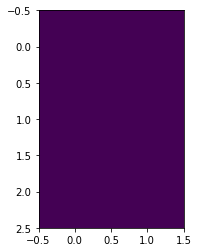

In [46]:
pl.imshow(masks[0])

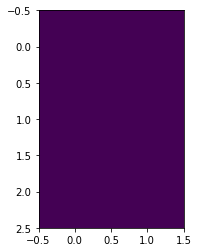

In [47]:
pl.imshow(masks[1])

In [49]:
final_array.shape

(4, 3, 2)

In [50]:
final_array[0,0,0]

nan

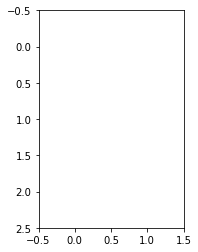

In [51]:
pl.imshow(final_array[0,:,:])

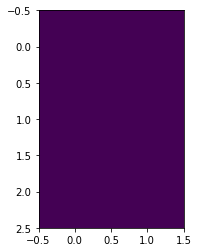

In [52]:
pl.imshow((mask_opt == 0) & (final_array[0,:,:] != 0))

In [53]:
cubes

[DaskSpectralCube with shape=(4, 2, 2) and unit=K and chunk size (4, 2, 2):
  n_x:      2  type_x: RA---SIN  unit_x: deg    range:    24.062698 deg:   24.063344 deg
  n_y:      2  type_y: DEC--SIN  unit_y: deg    range:    29.934094 deg:   29.934654 deg
  n_s:      4  type_s: VOPT      unit_s: km / s  range:     -321.215 km / s:    -317.350 km / s,
 DaskSpectralCube with shape=(4, 2, 2) and unit=K and chunk size (4, 2, 2):
  n_x:      2  type_x: RA---SIN  unit_x: deg    range:    24.062703 deg:   24.063349 deg
  n_y:      2  type_y: DEC--SIN  unit_y: deg    range:    29.934649 deg:   29.935209 deg
  n_s:      4  type_s: VOPT      unit_s: km / s  range:     -321.215 km / s:    -317.350 km / s]